This notebook reads the hdf5 files and compares the surface reflectance of paired pixels and the statiscially calibrated results.

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error#, r2_score
import seaborn as sns
import vaex as vx


# Landsat 7 to Landsat 8 RMA

In [17]:
bluePath = r"/data/shunan/data/harmonize_data/201305_08landsat/blue.hdf5"
greenPath = r"/data/shunan/data/harmonize_data/201305_08landsat/green.hdf5"
redPath = r"/data/shunan/data/harmonize_data/201305_08landsat/red.hdf5"
nirPath = r"/data/shunan/data/harmonize_data/201305_08landsat/nir.hdf5"
swir1Path = r"/data/shunan/data/harmonize_data/201305_08landsat/swir1.hdf5"
swir2Path = r"/data/shunan/data/harmonize_data/201305_08landsat/swir2.hdf5"

## Blue

RMA RMSE is 0.1275
OLS RMSE is 0.1229


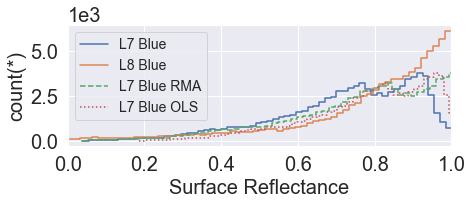

In [18]:
df = vx.open(bluePath)
df['L7blueRMA'] = df.L7blue * 1.1017 - 0.0084
df['L7blueOLS'] = df.L7blue * 0.8827 + 0.1510

index = (df.L7blue>0) & (df.L7blue<1) & (df.L8blue>0) & (df.L8blue<1)
df = df[index]
# kwargs={'color': 'k', 'linestyle': '--'}
fig, ax = plt.subplots(figsize=(7,3)) #figsize=(8,7)
sns.set_theme(style="darkgrid") 
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"

df.viz.histogram(x=df.L7blue, label='L7 Blue')   
df.viz.histogram(x=df.L8blue, label='L8 Blue')   
df.viz.histogram(x=df.L7blueRMA, label='L7 Blue RMA', **{'linestyle': '--'})
df.viz.histogram(x=df.L7blueOLS, label='L7 Blue OLS', **{'linestyle': ':'})
plt.legend()
plt.xlim(0,1)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set(xlabel = 'Surface Reflectance')
fig.savefig('print/L7L8/Bluehist.jpg', dpi=300, bbox_inches="tight")
print('RMA RMSE is %.4f' % (mean_squared_error(df.L8blue.values, df.L7blueRMA.values, squared=False)))
print('OLS RMSE is %.4f' % (mean_squared_error(df.L8blue.values, df.L7blueOLS.values, squared=False)))

## Green

RMA RMSE is 0.1222
OLS RMSE is 0.1165


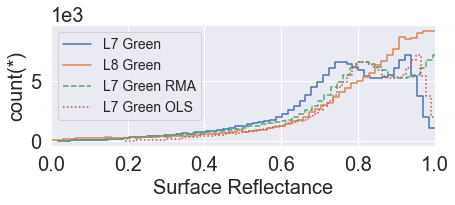

In [19]:
df = vx.open(greenPath)
df['L7greenRMA'] = df.L7green * 1.0840 - 0.0065
df['L7greenOLS'] = df.L7green * 0.8395 + 0.1771

index = (df.L7green>0) & (df.L7green<1) & (df.L8green>0) & (df.L8green<1)
df = df[index]

fig, ax = plt.subplots(figsize=(7,3)) #figsize=(8,7)
sns.set_theme(style="darkgrid") 
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"
df.viz.histogram(x=df.L7green, label='L7 Green')   
df.viz.histogram(x=df.L8green, label='L8 Green')   
df.viz.histogram(x=df.L7greenRMA, label='L7 Green RMA', **{'linestyle': '--'})
df.viz.histogram(x=df.L7greenOLS, label='L7 Green OLS', **{'linestyle': ':'})
plt.legend()
plt.xlim(0,1)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set(xlabel = 'Surface Reflectance')
fig.savefig('print/L7L8/Greenhist.jpg', dpi=300, bbox_inches="tight")
print('RMA RMSE is %.4f' % (mean_squared_error(df.L8green.values, df.L7greenRMA.values, squared=False)))
print('OLS RMSE is %.4f' % (mean_squared_error(df.L8green.values, df.L7greenOLS.values, squared=False)))

## Red

RMA RMSE is 0.1288
OLS RMSE is 0.1249


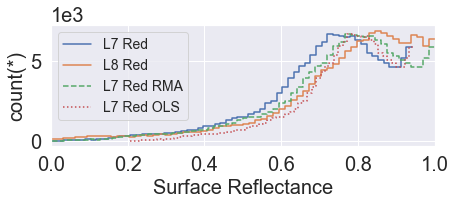

In [20]:
df = vx.open(redPath)
df['L7redRMA'] = df.L7red * 1.0610 + 0.0022
df['L7redOLS'] = df.L7red * 0.7877 + 0.2048

index = (df.L7red>0) & (df.L7red<1) & (df.L8red>0) & (df.L8red<1) & (df.L7redRMA>0) & (df.L7redRMA<1)
df = df[index]

fig, ax = plt.subplots(figsize=(7,3)) #figsize=(8,7)
sns.set_theme(style="darkgrid") 
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"
df.viz.histogram(x=df.L7red, label='L7 Red')   
df.viz.histogram(x=df.L8red, label='L8 Red')   
df.viz.histogram(x=df.L7redRMA, label='L7 Red RMA', **{'linestyle': '--'})
df.viz.histogram(x=df.L7redOLS, label='L7 Red OLS', **{'linestyle': ':'})
plt.legend()
plt.xlim(0,1)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set(xlabel = 'Surface Reflectance')
fig.savefig('print/L7L8/Redhist.jpg', dpi=300, bbox_inches="tight")
print('RMA RMSE is %.4f' % (mean_squared_error(df.L8red.values, df.L7redRMA.values, squared=False)))
print('OLS RMSE is %.4f' % (mean_squared_error(df.L8red.values, df.L7redOLS.values, squared=False)))

## NIR

RMA RMSE is 0.1403
OLS RMSE is 0.1342


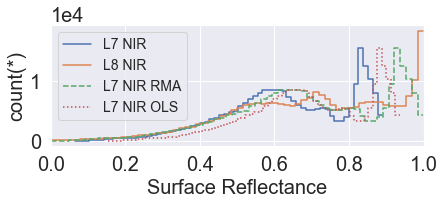

In [21]:
df = vx.open(nirPath)
df['L7nirRMA'] = df.L7nir * 1.2100 - 0.0768
df['L7nirOLS'] = df.L7nir * 0.9487 + 0.0928

index = (df.L7nir>0) & (df.L7nir<1) & (df.L8nir>0) & (df.L8nir<1) & (df.L7nirRMA>0) & (df.L7nirRMA<1)
df = df[index]

fig, ax = plt.subplots(figsize=(7,3)) #figsize=(8,7)
sns.set_theme(style="darkgrid") 
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"
df.viz.histogram(x=df.L7nir, label='L7 NIR')   
df.viz.histogram(x=df.L8nir, label='L8 NIR')   
df.viz.histogram(x=df.L7nirRMA, label='L7 NIR RMA', **{'linestyle': '--'})
df.viz.histogram(x=df.L7nirOLS, label='L7 NIR OLS', **{'linestyle': ':'})
plt.legend()
plt.xlim(0,1)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set(xlabel = 'Surface Reflectance')
fig.savefig('print/L7L8/NIRhist.jpg', dpi=300, bbox_inches="tight")
print('RMA RMSE is %.4f' % (mean_squared_error(df.L8nir.values, df.L7nirRMA.values, squared=False)))
print('OLS RMSE is %.4f' % (mean_squared_error(df.L8nir.values, df.L7nirOLS.values, squared=False)))

## SWIR1

RMA RMSE is 0.0491
OLS RMSE is 0.0411


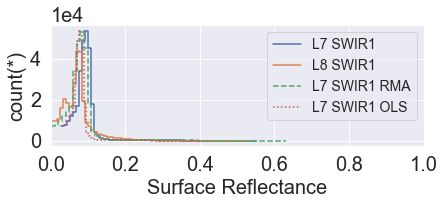

In [22]:
df = vx.open(swir1Path)
df['L7swir1RMA'] = df.L7swir1 * 1.2039 - 0.0314
df['L7swir1OLS'] = df.L7swir1 * 0.7091 + 0.0119

index = (df.L7swir1>0) & (df.L7swir1<1) & (df.L8swir1>0) & (df.L8swir1<1) & (df.L7swir1RMA>0) & (df.L7swir1RMA<1)
df = df[index]

fig, ax = plt.subplots(figsize=(7,3)) #figsize=(8,7)
sns.set_theme(style="darkgrid") 
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"
df.viz.histogram(x=df.L7swir1, label='L7 SWIR1')   
df.viz.histogram(x=df.L8swir1, label='L8 SWIR1')   
df.viz.histogram(x=df.L7swir1RMA, label='L7 SWIR1 RMA', **{'linestyle': '--'})
df.viz.histogram(x=df.L7swir1OLS, label='L7 SWIR1 OLS', **{'linestyle': ':'})
plt.legend()
plt.xlim(0,1)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set(xlabel = 'Surface Reflectance')
fig.savefig('print/L7L8/SWIR1hist.jpg', dpi=300, bbox_inches="tight")
print('RMA RMSE is %.4f' % (mean_squared_error(df.L8swir1.values, df.L7swir1RMA.values, squared=False)))
print('OLS RMSE is %.4f' % (mean_squared_error(df.L8swir1.values, df.L7swir1OLS.values, squared=False)))

## SWIR2

RMA RMSE is 0.0415
OLS RMSE is 0.0387


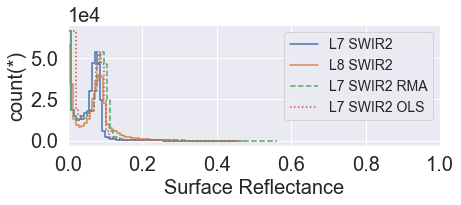

In [23]:
df = vx.open(swir2Path)
df['L7swir2RMA'] = df.L7swir2 * 1.2402 - 0.0022
df['L7swir2OLS'] = df.L7swir2 * 0.9720 + 0.0130

index = (df.L7swir2>0) & (df.L7swir2<1) & (df.L8swir2>0) & (df.L8swir2<1) & (df.L7swir2RMA>0) & (df.L7swir2RMA<1)
df = df[index]

fig, ax = plt.subplots(figsize=(7,3)) #figsize=(8,7)
sns.set_theme(style="darkgrid") 
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"
df.viz.histogram(x=df.L7swir2, label='L7 SWIR2')   
df.viz.histogram(x=df.L8swir2, label='L8 SWIR2')   
df.viz.histogram(x=df.L7swir2RMA, label='L7 SWIR2 RMA', **{'linestyle': '--'})
df.viz.histogram(x=df.L7swir2OLS, label='L7 SWIR2 OLS', **{'linestyle': ':'})
plt.legend()
plt.xlim(0,1)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set(xlabel = 'Surface Reflectance')
fig.savefig('print/L7L8/SWIR2hist.jpg', dpi=300, bbox_inches="tight")
print('RMA RMSE is %.4f' % (mean_squared_error(df.L8swir2.values, df.L7swir2RMA.values, squared=False)))
print('OLS RMSE is %.4f' % (mean_squared_error(df.L8swir2.values, df.L7swir2OLS.values, squared=False)))

# Sentinel 2 to Landsat 8 RMA

In [24]:
bluePath = r"/data/shunan/data/harmonize_data/202005_08sentinel/blue.hdf5"
greenPath = r"/data/shunan/data/harmonize_data/202005_08sentinel/green.hdf5"
redPath = r"/data/shunan/data/harmonize_data/202005_08sentinel/red.hdf5"
nirPath = r"/data/shunan/data/harmonize_data/202005_08sentinel/nir.hdf5"
swir1Path = r"/data/shunan/data/harmonize_data/202005_08sentinel/swir1.hdf5"
swir2Path = r"/data/shunan/data/harmonize_data/202005_08sentinel/swir2.hdf5"

## Blue

RMA RMSE is 0.1226
OLS RMSE is 0.1177


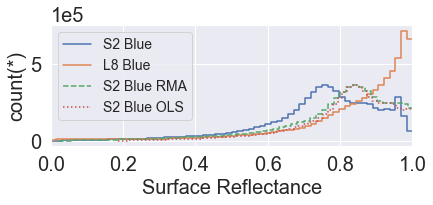

In [25]:
df = vx.open(bluePath)
df['S2blueRMA'] = df.S2blue * 1.0849 + 0.0210
df['S2blueOLS'] = df.S2blue * 0.8639 + 0.1855

index = (df.S2blue>0) & (df.S2blue<1) & (df.L8blue>0) & (df.L8blue<1) 
df = df[index]

fig, ax = plt.subplots(figsize=(7,3)) #figsize=(8,7)
sns.set_theme(style="darkgrid") 
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"
df.viz.histogram(x=df.S2blue, label='S2 Blue')   
df.viz.histogram(x=df.L8blue, label='L8 Blue')   
df.viz.histogram(x=df.S2blueRMA, label='S2 Blue RMA', **{'linestyle': '--'})
df.viz.histogram(x=df.S2blueOLS, label='S2 Blue OLS', **{'linestyle': ':'})
plt.legend()
plt.xlim(0,1)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set(xlabel = 'Surface Reflectance')
fig.savefig('print/S2L8/Bluehist.jpg', dpi=300, bbox_inches="tight")
print('RMA RMSE is %.4f' % (mean_squared_error(df.L8blue.values, df.S2blueRMA.values, squared=False)))
print('OLS RMSE is %.4f' % (mean_squared_error(df.L8blue.values, df.S2blueOLS.values, squared=False)))

## Green

RMA RMSE is 0.1192
OLS RMSE is 0.1135


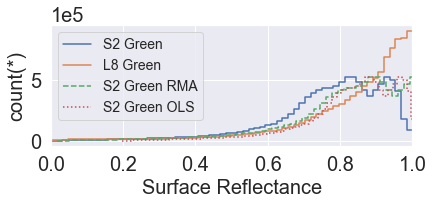

In [26]:
df = vx.open(greenPath)
df['S2greenRMA'] = df.S2green * 1.0590 + 0.0167
df['S2greenOLS'] = df.S2green * 0.8262 + 0.1965

index = (df.S2green>0) & (df.S2green<1) & (df.L8green>0) & (df.L8green<1) 
df = df[index]

fig, ax = plt.subplots(figsize=(7,3)) #figsize=(8,7)
sns.set_theme(style="darkgrid") 
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"
df.viz.histogram(x=df.S2green, label='S2 Green')   
df.viz.histogram(x=df.L8green, label='L8 Green')   
df.viz.histogram(x=df.S2greenRMA, label='S2 Green RMA', **{'linestyle': '--'})
df.viz.histogram(x=df.S2greenOLS, label='S2 Green OLS', **{'linestyle': ':'})
plt.legend()
plt.xlim(0,1)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set(xlabel = 'Surface Reflectance')
fig.savefig('print/S2L8/Greenhist.jpg', dpi=300, bbox_inches="tight")
print('RMA RMSE is %.4f' % (mean_squared_error(df.L8green.values, df.S2greenRMA.values, squared=False)))
print('OLS RMSE is %.4f' % (mean_squared_error(df.L8green.values, df.S2greenOLS.values, squared=False)))

## Red

RMA RMSE is 0.1203
OLS RMSE is 0.1140


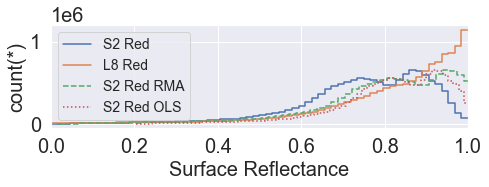

In [27]:
df = vx.open(redPath)
df['S2redRMA'] = df.S2red * 1.0759 + 0.0155
df['S2redOLS'] = df.S2red * 0.8246 + 0.2047

index = (df.S2red>0) & (df.S2red<1) & (df.L8red>0) & (df.L8red<1) 
df = df[index]

fig, ax = plt.subplots(figsize=(7,3)) #figsize=(8,7)
sns.set_theme(style="darkgrid") 
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"
df.viz.histogram(x=df.S2red, label='S2 Red')   
df.viz.histogram(x=df.L8red, label='L8 Red')   
df.viz.histogram(x=df.S2redRMA, label='S2 Red RMA', **{'linestyle': '--'})
df.viz.histogram(x=df.S2redOLS, label='S2 Red OLS', **{'linestyle': ':'})
plt.legend()
plt.xlim(0,1)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set(xlabel = 'Surface Reflectance')
fig.savefig('print/S2L8/Redhist.jpg', dpi=300, bbox_inches="tight")
print('RMA RMSE is %.4f' % (mean_squared_error(df.L8red.values, df.S2redRMA.values, squared=False)))
print('OLS RMSE is %.4f' % (mean_squared_error(df.L8red.values, df.S2redOLS.values, squared=False)))

## NIR

RMA RMSE is 0.1029
OLS RMSE is 0.0990


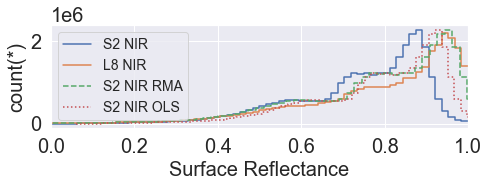

In [28]:
df = vx.open(nirPath)
df['S2nirRMA'] = df.S2nir * 1.1583 - 0.0693
df['S2nirOLS'] = df.S2nir * 0.9838 + 0.0604

index = (df.S2nir>0) & (df.S2nir<1) & (df.L8nir>0) & (df.L8nir<1) 
df = df[index]

fig, ax = plt.subplots(figsize=(7,3)) #figsize=(8,7)
sns.set_theme(style="darkgrid") 
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"
df.viz.histogram(x=df.S2nir, label='S2 NIR')   
df.viz.histogram(x=df.L8nir, label='L8 NIR')   
df.viz.histogram(x=df.S2nirRMA, label='S2 NIR RMA', **{'linestyle': '--'})
df.viz.histogram(x=df.S2nirOLS, label='S2 NIR OLS', **{'linestyle': ':'})
plt.legend()
plt.xlim(0,1)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set(xlabel = 'Surface Reflectance')
fig.savefig('print/S2L8/NIRhist.jpg', dpi=300, bbox_inches="tight")
print('RMA RMSE is %.4f' % (mean_squared_error(df.L8nir.values, df.S2nirRMA.values, squared=False)))
print('OLS RMSE is %.4f' % (mean_squared_error(df.L8nir.values, df.S2nirOLS.values, squared=False)))

## SWIR1

RMA RMSE is 0.0362
OLS RMSE is 0.0333


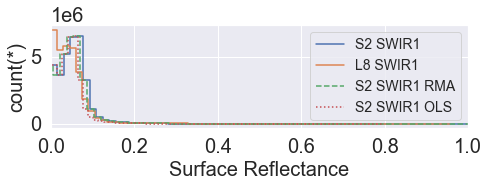

In [29]:
df = vx.open(swir1Path)
df['S2swir1RMA'] = df.S2swir1 * 1.0479 - 0.0112
df['S2swir1OLS'] = df.S2swir1 * 0.7917 + 0.0030

index = (df.S2swir1>0) & (df.S2swir1<1) & (df.L8swir1>0) & (df.L8swir1<1) 
df = df[index]

fig, ax = plt.subplots(figsize=(7,3)) #figsize=(8,7)
sns.set_theme(style="darkgrid") 
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"
df.viz.histogram(x=df.S2swir1, label='S2 SWIR1')   
df.viz.histogram(x=df.L8swir1, label='L8 SWIR1')   
df.viz.histogram(x=df.S2swir1RMA, label='S2 SWIR1 RMA', **{'linestyle': '--'})
df.viz.histogram(x=df.S2swir1OLS, label='S2 SWIR1 OLS', **{'linestyle': ':'})
plt.legend()
plt.xlim(0,1)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set(xlabel = 'Surface Reflectance')
fig.savefig('print/S2L8/SWIR1hist.jpg', dpi=300, bbox_inches="tight")
print('RMA RMSE is %.4f' % (mean_squared_error(df.L8swir1.values, df.S2swir1RMA.values, squared=False)))
print('OLS RMSE is %.4f' % (mean_squared_error(df.L8swir1.values, df.S2swir1OLS.values, squared=False)))

## SWIR2

RMA RMSE is 0.0371
OLS RMSE is 0.0338


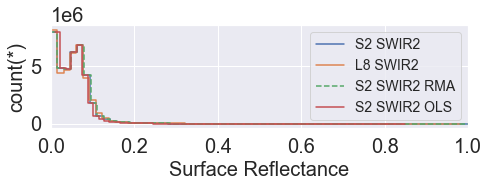

In [30]:
df = vx.open(swir2Path)
df['S2swir2RMA'] = df.S2swir2 * 1.0152 + 0.0000
df['S2swir2OLS'] = df.S2swir2 * 0.8410 + 0.0091

index = (df.S2swir2>0) & (df.S2swir2<1) & (df.L8swir2>0) & (df.L8swir2<1) 
df = df[index]

fig, ax = plt.subplots(figsize=(7,3)) #figsize=(8,7)
sns.set_theme(style="darkgrid") 
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"
df.viz.histogram(x=df.S2swir2, label='S2 SWIR2')   
df.viz.histogram(x=df.L8swir2, label='L8 SWIR2')   
df.viz.histogram(x=df.S2swir2RMA, label='S2 SWIR2 RMA', **{'linestyle': '--'})
df.viz.histogram(x=df.S2swir2OLS, label='S2 SWIR2 OLS')
plt.legend()
plt.xlim(0,1)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set(xlabel = 'Surface Reflectance')
fig.savefig('print/S2L8/SWIR2hist.jpg', dpi=300, bbox_inches="tight")
print('RMA RMSE is %.4f' % (mean_squared_error(df.L8swir2.values, df.S2swir2RMA.values, squared=False)))
print('OLS RMSE is %.4f' % (mean_squared_error(df.L8swir2.values, df.S2swir2OLS.values, squared=False)))